# **Aviation Safety Analysis: Identifying Low-Risk Aircraft for Business Expansion**
___

## **Problem Statement**
As part of its expansion strategy, our company is looking to enter the aviation industry by purchasing and operating aircraft for both commercial and private enterprises. However, the company lacks insights into the potential risks associated with different aircraft types. To ensure informed decision-making, it is critical to identify the safest aircraft options while considering historical accident data, common risk factors, and patterns in aviation incidents.

This project aims to analyze aviation accident data from 1962 to 2023 to uncover trends, assess risk factors, and generate actionable recommendations. By leveraging data cleaning, imputation, and visualization techniques, we will provide the head of the aviation division with insights that support data-driven aircraft selection. 

Our analysis will focus on:

1. **Identifying Aircraft with the Lowest Risk** – Determining which aircraft models and categories have the safest operational history.

2. **Understanding Key Risk Factors** – Examining accident causes, injury severity, and flight conditions that contribute to higher risk.

3. **Providing Business Recommendations** – Translating findings into practical insights that will guide the company's aviation investment strategy.

Through this analysis, we aim to mitigate potential risks and support a strategic entry into the aviation industry.
___

## **Project Overview** 
### **Project Objective**
Our company is venturing into the aviation industry but lacks insights into aircraft safety risks. This project analyzes aviation accident data to identify low-risk aircraft, guiding strategic purchasing decisions with data-driven recommendations.

### **Project Approach**
To achieve this, we will:

1. **Clean and preprocess the data** – Address missing values and inconsistencies.

2. **Analyze accident trends** – Identify key risk factors.

3. **Assess aircraft safety** – Determine which models have the safest records.

4. **Visualize insights** – Use clear, impactful visuals to communicate findings.

5. **Provide business recommendations** – Support informed decision-making.
___

## **Dataset Overview**
To make informed decisions about aircraft safety and operational risks, we are analyzing two datasets from the [National Transportation Safety Board (NTSB)](https://www.kaggle.com/datasets/khsamaha/aviation-accident-database-synopses):

### **1. Aviation Accident Data (`df1`)** 
This dataset contains 88,889 records across 31 columns, documenting aviation incidents from 1962 to 2023. It provides a comprehensive view of:

- **Accident details** – Date, location, phase of flight, and severity.

- **Aircraft information** – Make, model, engine type, and category.

- **Injury reports** – Number of fatalities, serious injuries, and uninjured individuals.

- **Environmental and operational factors** – Weather conditions, flight purpose, and airport details.

### **2. U.S. State Codes (`df2`)**
A reference dataset with 62 records, mapping state names to their standard abbreviations. This will help standardize location data for better analysis.

### **Why This Data Matters**
Aviation accidents result from a combination of factors, and understanding these patterns is key to risk assessment. By analyzing trends in aircraft safety, we aim to determine which aircraft have the lowest accident rates and provide actionable recommendations for strategic investments in the aviation sector.

Next, we will clean and explore the data to uncover valuable insights.
___

## **Importing Libraries and Loading Datasets**  

To start our analysis, we import essential Python libraries for data manipulation and visualization:  

- **pandas (`pd`)** – Used for data cleaning, manipulation, and analysis.  
- **numpy (`np`)** – Supports numerical operations and handling missing values.  
- **matplotlib (`plt`)** – Enables basic visualizations.  
- **seaborn (`sns`)** – Enhances statistical plotting for better insights.  

We then load our datasets:  

- **`df1`: Aviation Accident Data** – (`AviationData.csv`), which contains detailed records of aviation accidents, including aircraft details, accident severity, and contributing factors.  
- **`df2`: U.S. State Codes** – (`USState_Codes.csv`), a reference dataset mapping state names to their standard abbreviations for location standardization.  

To ensure smooth loading:  
- We use `encoding='latin-1'` to handle special characters.  
- We set `low_memory=False` to optimize performance since `df1` is a large dataset.  



In [229]:
# Importing all the necessary libraries to ensure my code runs efficiently 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline 
import seaborn as sns 
sns.set_style('whitegrid')

# Ensuring all columns are displayed
pd.set_option('display.max_columns', 40)

# Opening and reading the data files
df1 = pd.read_csv('AviationData.csv', encoding ='latin-1', low_memory=False)
df2 = pd.read_csv('USState_Codes.csv')

### **Understanding Datasets Overall Structure**
To understand our dataset, we examine its shape (number of rows and columns) and column names. This helps us:

- Confirm the dataset size and complexity.

- Identify all available variables for analysis.

- Plan how to clean, transform, and utilize different columns effectively.

#### **a) Dataset structure and size**

In [230]:
# Confirm the number of rows and columns in our datasets 
print (f'Aviation dataset rows and columns: {df1.shape}')
print (f'Us_States dataset rows and columns: {df2.shape} \n')

# Confirm the size of each dataset 
print (f'Aviation dataset number of elements: {df1.size}')
print (f'Us_States number of element: {df2.size}')

Aviation dataset rows and columns: (88889, 31)
Us_States dataset rows and columns: (62, 2) 

Aviation dataset number of elements: 2755559
Us_States number of element: 124


#### **b) Available Columns in our datasets**

In [231]:
print(len(df1.columns))

31


In [232]:
df1.columns

Index(['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date',
       'Location', 'Country', 'Latitude', 'Longitude', 'Airport.Code',
       'Airport.Name', 'Injury.Severity', 'Aircraft.damage',
       'Aircraft.Category', 'Registration.Number', 'Make', 'Model',
       'Amateur.Built', 'Number.of.Engines', 'Engine.Type', 'FAR.Description',
       'Schedule', 'Purpose.of.flight', 'Air.carrier', 'Total.Fatal.Injuries',
       'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured',
       'Weather.Condition', 'Broad.phase.of.flight', 'Report.Status',
       'Publication.Date'],
      dtype='object')

In [233]:
print(len(df2.columns))

2


In [234]:
df2.columns

Index(['US_State', 'Abbreviation'], dtype='object')

## **Initial Data Exploration**  

Before cleaning or processing the dataset, we first need to understand its structure. This involves:  

- **Checking the first few rows** – Provides a preview of the data.  
- **Examining dataset information** – Identifies column names, data types, and missing values.  
- **Checking for missing values** – Helps determine the extent of missing data.  
- **Detecting duplicate rows** – Ensures data integrity by removing unnecessary duplicates.  
- **Reviewing numerical statistics** – Gives a summary of numerical columns for quick insights.  

These steps help us assess data quality and guide our cleaning process.  

### **1. Checking the first few rows to get get a preview of the data**
#### **a) Aviation data Overview**
The following is a preview of the Aviation dataset. It basically contains aviation accident details such as the accident details, aircraft information, injury reports, environmental factors, and operational factors. 

In [235]:
# preview of aviation accident data file 
df1.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,Injury.Severity,Aircraft.damage,Aircraft.Category,Registration.Number,Make,Model,Amateur.Built,Number.of.Engines,Engine.Type,FAR.Description,Schedule,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,Fatal(2),Destroyed,NaN,NC6404,Stinson,108-3,No,1.0,Reciprocating,NaN,NaN,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,Fatal(4),Destroyed,NaN,N5069P,Piper,PA24-180,No,1.0,Reciprocating,NaN,NaN,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,Fatal(3),Destroyed,NaN,N5142R,Cessna,172M,No,1.0,Reciprocating,NaN,NaN,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,Fatal(2),Destroyed,NaN,N1168J,Rockwell,112,No,1.0,Reciprocating,NaN,NaN,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,Fatal(1),Destroyed,NaN,N15NY,Cessna,501,No,NaN,NaN,NaN,NaN,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


##### **b) USState Codes Data Overview**
Below we have the preview the USState-Codes Data and it maps the state names to their standard abbreviation for better analysis. 

In [236]:
#preview of selected incidents in the United States 
df2.head()

,US_State,Abbreviation
0,Alabama,AL
1,Alaska,AK
2,Arizona,AZ
3,Arkansas,AR
4,California,CA


### **2. Checking the dataset information (column names, data types, missing values)**
#### **a) Aviation data information**
Below we have a basic breakdown of the aviation data information namely the number of rows, number of columns, number of non-null values in each column, and the datatype of values in each column. 

In [237]:
#df1 column names, data types and non-null values
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      88889 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50249 non-null  object 
 9   Airport.Name            52790 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87572 non-null  object 
 14  Make                    88826 non-null

#### **b) US State Codes data information**
Below we have a basic breakdown of the US State Codes data information namely the number of rows, number of columns, number of non-null values in each column, and the datatype of values in each column. 

In [238]:
#df2 column names, data types and non-null values
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   US_State      62 non-null     object
 1   Abbreviation  62 non-null     object
dtypes: object(2)
memory usage: 1.1+ KB


### **3. To determine how much data is missing** 
Missing data can affect the accuracy and reliability of our analysis. Identifying missing values helps us decide how to handle them—whether by imputing, removing, or flagging them—ensuring that our insights remain valid and data-driven. Understanding the extent of missing data also prevents biased conclusions and helps maintain data integrity.

#### **a) Missing Values in df1**
We used isna().sum() to calculate the total number of missing values in each column. This allowed us to identify which columns had the highest number of missing values and determine the best approach for handling them based on their relevance to our analysis.

In [239]:
#missing values in df1
df1.isna().sum()

Event.Id                      0
Investigation.Type            0
Accident.Number               0
Event.Date                    0
Location                     52
Country                     226
Latitude                  54507
Longitude                 54516
Airport.Code              38640
Airport.Name              36099
Injury.Severity            1000
Aircraft.damage            3194
Aircraft.Category         56602
Registration.Number        1317
Make                         63
Model                        92
Amateur.Built               102
Number.of.Engines          6084
Engine.Type                7077
FAR.Description           56866
Schedule                  76307
Purpose.of.flight          6192
Air.carrier               72241
Total.Fatal.Injuries      11401
Total.Serious.Injuries    12510
Total.Minor.Injuries      11933
Total.Uninjured            5912
Weather.Condition          4492
Broad.phase.of.flight     27165
Report.Status              6381
Publication.Date          13771
dtype: i

##### **Observation**
Several columns in df1 contain null values. We will conduct a deeper analysis during the data cleaning process to determine the best approach for handling them.

##### **b) Missing Values in df2**
Similar to df1, we used isna().sum() to calculate the total number of missing values in each column. This allowed us to identify which columns had the highest number of missing values and determine the best approach for handling them based on their relevance to our analysis.

In [240]:
#missing values in df2
df2.isna().sum()

US_State        0
Abbreviation    0
dtype: int64

##### **Observation**
There are no missing values in df2, therefore it is complete for analysis. 

### **4. Checking for duplicates in the datasets**
It is crucial to check for duplicates because duplicate records can distort analysis by overrepresenting certain events, leading to misleading conclusions. Identifying and removing duplicates ensures data accuracy, prevents biased insights, and maintains the integrity of statistical summaries. In aviation safety analysis, duplicate accident reports could inflate incident counts, affecting risk assessments and business decisions.

#### **a) Duplicates in df1**
We used .duplicated().sum() to identify the number of duplicate records in our dataset. Detecting duplicates is crucial to maintaining data integrity and ensuring accurate analysis. Removing them helps prevent misleading conclusions that could impact our findings and recommendations.

In [241]:
# check for duplicates in df1 
df1.duplicated().sum()

0

##### **Observation**
There are no duplicate records in df1, which indicates that each entry represents a unique aviation incident. This ensures data integrity and reduces the need for additional cleaning related to duplicate removal.

#### **b) Duplicates in df2**

In [242]:
# Check for duplicates in df2 
df2.duplicated().sum()

0

##### **Observation**
There are no duplicate records in df2 either, which indicates that each entry represents a unique aviation incident. This ensures data integrity and reduces the need for additional cleaning related to duplicate removal.

### **5. Understanding the numerical statistics**

We analyzed the numerical statistics of df1 to gain insights into data distribution, identify potential outliers, and understand key trends. This step was not performed for df2 since it only contains categorical data.

In [243]:
# df1 numerical statitics summary 
df1.describe()

,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
count,82805.000000,77488.000000,76379.000000,76956.000000,82977.000000
mean,1.146585,0.647855,0.279881,0.357061,5.325440
std,0.446510,5.485960,1.544084,2.235625,27.913634
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,0.000000,0.000000,0.000000,2.000000
max,8.000000,349.000000,161.000000,380.000000,699.000000


##### **Observation** 

Only five columns in df1 contain numerical values: `Number.of.Engines`, `Total.Fatal.Injuries`, `Total.Serious.Injuries`, `Total.Minor.Injuries`, and `Total.Uninjured`. Their statistical summary provides key insights into accident severity and aircraft specifications. 

 
## **Data Cleaning**
Before conducting analysis, it is crucial to clean and preprocess the dataset to ensure accuracy and reliability. This process includes:

1. **Handling Missing Values** – Identifying and addressing gaps in the data.

2. **Detecting and Correcting Invalid Entries** – Ensuring data consistency and accuracy.

3. **Removing Duplicates** – While no duplicates were found in this dataset, this step is essential in data cleaning.

4. **Data Visualization** – Exploring patterns, trends, and anomalies to draw meaningful insights.

By implementing these steps, we ensure that the dataset is structured, consistent, and ready for meaningful insights.

### **1. Missing Values in the Dataset**
Missing values can impact our analysis by introducing bias or reducing the accuracy of insights. By visualizing the missing data, we can determine which columns require imputation, removal, or further investigation. The bar plot below shows the number of missing values per column, helping us make informed decisions on data cleaning.

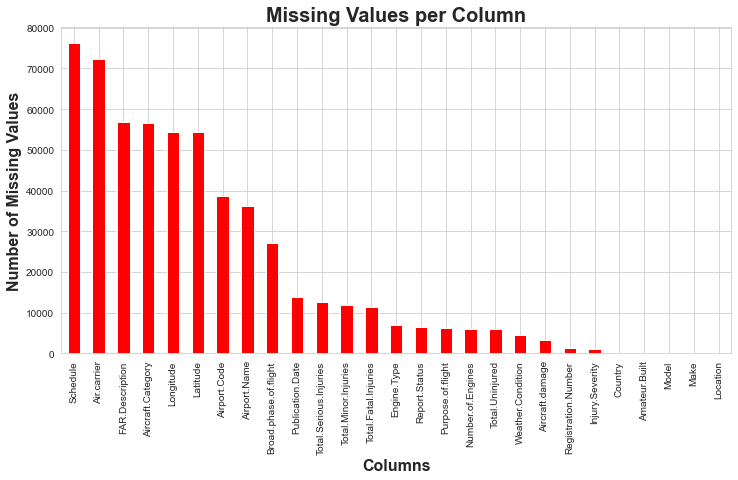

In [244]:
# A bar plot to show the distribution of missing data. 

missing_counts = df1.isna().sum()
missing_counts = missing_counts[missing_counts > 0].sort_values(ascending=False)

plt.figure(figsize=(12,6))
missing_counts.plot(kind='bar', color='red')
plt.xlabel('Columns', fontsize=16, weight='semibold')
plt.ylabel('Number of Missing Values', fontsize=16, weight='semibold')
plt.title('Missing Values per Column', fontsize=20, weight='bold')
plt.xticks(rotation=90)
plt.show()

### **Handling missing values**

In this section, we will address missing values in our dataset to ensure accuracy and consistency.  

#### **Approach:**  
- **Drop columns with excessive missing values** – If a column is mostly empty, it might not be useful for our analysis.  
- **Drop rows with missing critical information** – If a row lacks essential details, it may be best to remove it.    
- **Keep some missing values** – In certain cases, missing values may still hold meaning and will be left as-is.  

This step is crucial to maintaining data integrity before proceeding with further analysis.

#### **a). Creating a Copy of the Dataset**
Before making any modifications, we will create a copy of our dataset. This ensures that we always have the original data intact in case we need to refer back to it.

In [245]:
# create a copy of our dataset
df1_copy = df1.copy()

#### **b). Dropping columns with excessive missing values** 
Now that we have identified columns with excessive missing values, the next step is deciding how to handle them. We can choose to Drop columns with excessive missing values especially if they are unlikely to add significant value to our analysis.

##### **Number of missing values per columns**

In [246]:
# number of missing values per columns
df1_copy.isna().sum()

Event.Id                      0
Investigation.Type            0
Accident.Number               0
Event.Date                    0
Location                     52
Country                     226
Latitude                  54507
Longitude                 54516
Airport.Code              38640
Airport.Name              36099
Injury.Severity            1000
Aircraft.damage            3194
Aircraft.Category         56602
Registration.Number        1317
Make                         63
Model                        92
Amateur.Built               102
Number.of.Engines          6084
Engine.Type                7077
FAR.Description           56866
Schedule                  76307
Purpose.of.flight          6192
Air.carrier               72241
Total.Fatal.Injuries      11401
Total.Serious.Injuries    12510
Total.Minor.Injuries      11933
Total.Uninjured            5912
Weather.Condition          4492
Broad.phase.of.flight     27165
Report.Status              6381
Publication.Date          13771
dtype: i

##### **Dropping columns with excessive missing values**
In the next step, we drop columns with excessive missing values that are unlikely to provide meaningful insights.

In [247]:
#drop columns with lots of missing values, that are unlikely to contribute meaningful insights to our analysis. 
df1_copy.drop(columns=['Latitude', 'Longitude', 'Schedule', 'Air.carrier', 'FAR.Description', 'Airport.Code','Broad.phase.of.flight','Airport.Name'], inplace=True)

#confirming the changes 
df1_copy.shape

(88889, 23)

##### **Observation**
Eight columns were dropped, reducing the dataset to 23 columns.

#### **c). Missing values in the remaining dataset (Dropping rows with missing data)**
- In the step above, we dropped columns with a lot of missing data that may not bear any significance to our analysis. 

- Now we move on to missing data in columns that are significant to our analysis. 

- In this step, we are going to drop the rows with missing values to ensure our analysis is accurate. 

In [248]:
#drop rows with missing values for columns with significant details

df1_copy.dropna(subset=['Injury.Severity','Aircraft.Category','Aircraft.damage','Make', 'Model','Number.of.Engines', 'Engine.Type', 'Purpose.of.flight','Amateur.Built','Total.Fatal.Injuries', 'Total.Serious.Injuries','Total.Minor.Injuries', 'Total.Uninjured', 'Weather.Condition', 'Report.Status', 'Publication.Date'], inplace=True)

# confirming that our changes have been implemented
df1_copy.shape

(19787, 23)

##### **Observation**
After dropping specific rows, the dataset has been reduced from 88,889 to 19,787 rows.

#### **Confirm there are no missing values in the dataset**

In [249]:
# Confirm the number of missing values in our dataset. 
df1_copy.isna().sum()

Event.Id                  0
Investigation.Type        0
Accident.Number           0
Event.Date                0
Location                  0
Country                   9
Injury.Severity           0
Aircraft.damage           0
Aircraft.Category         0
Registration.Number       0
Make                      0
Model                     0
Amateur.Built             0
Number.of.Engines         0
Engine.Type               0
Purpose.of.flight         0
Total.Fatal.Injuries      0
Total.Serious.Injuries    0
Total.Minor.Injuries      0
Total.Uninjured           0
Weather.Condition         0
Report.Status             0
Publication.Date          0
dtype: int64

##### **Observation**
There are no missing values in the dataset, making it ready for analysis.

### **2. Handling Invalid Values (Based on data type)**


#### **a). Establishing Each Column's Data Types**
The first step is to establish our column data types in order to establish which ones need to be corrected. 

In [250]:
df1_copy.dtypes

Event.Id                   object
Investigation.Type         object
Accident.Number            object
Event.Date                 object
Location                   object
Country                    object
Injury.Severity            object
Aircraft.damage            object
Aircraft.Category          object
Registration.Number        object
Make                       object
Model                      object
Amateur.Built              object
Number.of.Engines         float64
Engine.Type                object
Purpose.of.flight          object
Total.Fatal.Injuries      float64
Total.Serious.Injuries    float64
Total.Minor.Injuries      float64
Total.Uninjured           float64
Weather.Condition          object
Report.Status              object
Publication.Date           object
dtype: object

##### **Observation**
To ensure data consistency, we need to correct the data types of specific columns:

- ***Event.Date and Publication.Date*** – These are currently stored as objects (strings) but represent dates. Converting them to a proper datetime format will enable accurate time-based analysis.

By making these adjustments, we ensure the dataset is properly structured for further analysis. 
  

#### **i). Converting dates to datetime format**

In [251]:
# Convert 'Event.Date' and 'Publication.Date' to datetime format
df1_copy['Event.Date'] = pd.to_datetime(df1_copy['Event.Date'], errors='coerce')
df1_copy['Publication.Date'] = pd.to_datetime(df1_copy['Publication.Date'], errors='coerce')

# Confirmation
df1_copy.dtypes


Event.Id                          object
Investigation.Type                object
Accident.Number                   object
Event.Date                datetime64[ns]
Location                          object
Country                           object
Injury.Severity                   object
Aircraft.damage                   object
Aircraft.Category                 object
Registration.Number               object
Make                              object
Model                             object
Amateur.Built                     object
Number.of.Engines                float64
Engine.Type                       object
Purpose.of.flight                 object
Total.Fatal.Injuries             float64
Total.Serious.Injuries           float64
Total.Minor.Injuries             float64
Total.Uninjured                  float64
Weather.Condition                 object
Report.Status                     object
Publication.Date          datetime64[ns]
dtype: object

##### **ii). Confirming the unique values in 'Amateur Built'**
Since Amateur.Built is a key column in our analysis, we needed to verify that it contains only 'Yes' and 'No' values to ensure data consistency.

In [252]:
# Confirm unique entries in ['Amateur.Built'] column
df1_copy['Amateur.Built'].unique()

array(['No', 'Yes'], dtype=object)

##### **iii). Standardizing text columns** 
To maintain consistency in our dataset, we standardized the 'Make' column by capitalizing all values. This ensures uniformity when analyzing aircraft manufacturers, preventing discrepancies caused by variations in capitalization (e.g., "boeing" vs. "Boeing"). Standardizing text data helps improve accuracy in grouping, filtering, and visualization.

In [253]:
# Capitalize all the airplane make values
df1_copy['Make'] = df1_copy['Make'].str.capitalize()

# Confirm
df1_copy['Make']

7                   Cessna
8                   Cessna
12                Bellanca
13                  Cessna
14                  Navion
               ...        
88639               Cessna
88647               Cessna
88661                Beech
88735    Stephen j hoffman
88767             Luscombe
Name: Make, Length: 19787, dtype: object

In [254]:
# Capitalize the Country names in the dataset
df1_copy['Country'] = df1_copy['Country'].str.capitalize()

# confirm
df1_copy['Country']

7        United states
8        United states
12       United states
13       United states
14       United states
             ...      
88639    United states
88647    United states
88661    United states
88735    United states
88767    United states
Name: Country, Length: 19787, dtype: object

### **3. Handling Duplicates**
As established in our Initial Data Exploration, there were no duplicates in the dataset. Therefore, no further action is needed in this regard.

In [255]:
# check for duplicates in df1 
df1_copy.duplicated().sum()

0

## **4. Data Visualization**
Data visualization is a crucial step in understanding the patterns, trends, and relationships within our dataset. By leveraging various graphical techniques, we can uncover hidden insights that might not be immediately apparent in raw data.

In this section, we will explore different visualizations to analyze the relationships between key variables, identify potential correlations, and detect anomalies. This process will help us draw meaningful conclusions, formulate observations, and provide data-driven recommendations.

#### **a). Understanding Relationships between Variables using correlation**
#####   **i). Computing the correlation matrix** 
A correlation matrix helps identify relationships between numerical variables. Strong positive or negative correlations can provide insights into how different factors interact in aviation accidents. The heatmap visually represents these correlations, where darker colors indicate stronger relationships.  


In [256]:
# Compute correlation matrix for numerical columns
correlation_matrix = df1_copy.corr()

# Display the correlation matrix
correlation_matrix


,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
Number.of.Engines,1.000000,0.125639,0.008397,0.038620,0.184181
Total.Fatal.Injuries,0.125639,1.000000,-0.077151,0.002031,-0.078766
Total.Serious.Injuries,0.008397,-0.077151,1.000000,0.056669,-0.041534
Total.Minor.Injuries,0.038620,0.002031,0.056669,1.000000,0.116449
Total.Uninjured,0.184181,-0.078766,-0.041534,0.116449,1.000000


##### **ii). Visualizing our correlation matrix**
We used a seaborn heatmap to visualize our correlation matrix. 

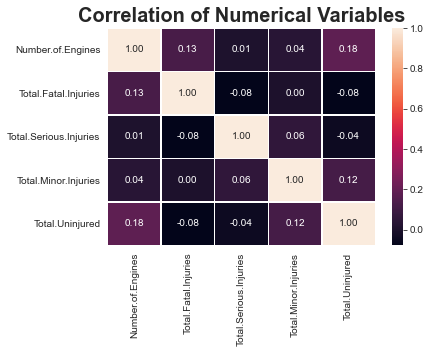

In [257]:
#set figure size 
plt.Figure(figsize=(12,10))

# Create heatmap 
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', linewidths=0.5)

# Add title 
plt.title('Correlation of Numerical Variables', fontsize=20, weight='bold')

# Show plot
plt.show()



##### **Observation** 
The correlation matrix reveals several insights about the relationships between numerical variables in our dataset. 
- There is a **`strong negative correlation`** between **`total fatal injuries` and `total serious injuries`**, indicating that as one increases, the other tends to decrease. 
- Additionally, **`total fatal injuries` and `total uninjured passengers`** show a **`weak negative correlation`**. 
- On the other hand, **`the number of engines` has a **`weak positive correlation`** with `total uninjured passengers` and `total fatal injuries`**, suggesting a slight association between engine count and accident outcomes. 
- Other relationships exhibit little to no correlation, meaning they do not have a significant linear relationship.

### **b). Analyzing Trends in Aviation Accidents**  

Understanding aviation accident patterns over time helps identify key risk factors and areas for improvement in air safety. In this section, we explore:  

1. **Accidents Over the Years** – Examining fluctuations in accident frequency.  
2. **Injury Severity Distribution** – Assessing how accident outcomes have changed.  
3. **Accident Distribution by Country** – Identifying regions with the highest incidents.  
4. **Accident Hotspots** – Highlighting specific locations with frequent accidents.  
5. **Most Frequently Involved Aircraft** – Analyzing aircraft models with the highest accident rates.  

By visualizing these trends, we aim to uncover meaningful insights into aviation safety and accident patterns.

#### **i). Accident Frequency over the years** 
Understanding how aviation accidents have changed over the years provides valuable insights into industry safety improvements, regulatory impacts, and potential risk factors. By visualizing accident frequency over time, we can identify patterns, such as periods of increased incidents or declining accident rates, and assess their implications for our analysis.
##### **- Line graph for accident frequency over the years**

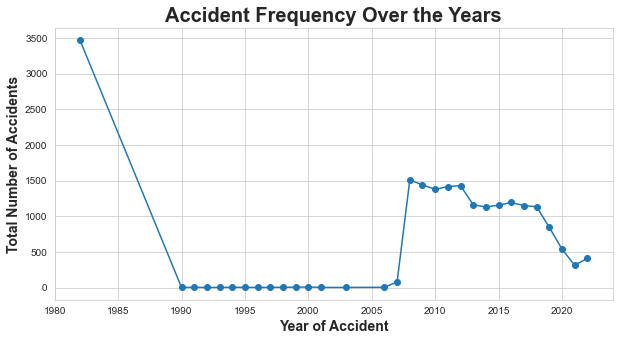

In [258]:
# Create new columns for the year the accident occured
df1_copy['year_of_accident'] = df1_copy['Event.Date'].dt.year

# Count the number of accidents per year
accidents_per_year = df1_copy['year_of_accident'].value_counts().sort_index()

# Plot the trend
plt.figure(figsize=(10, 5))
accidents_per_year.plot(kind='line', marker='o', linestyle='-')

# Labels and title
plt.xlabel('Year of Accident',fontsize=14, weight='semibold')
plt.ylabel('Total Number of Accidents', fontsize=14, weight='semibold')
plt.title('Accident Frequency Over the Years',fontsize=20, weight='bold')
plt.grid(True)
plt.show()


##### **- Bar graph for the same**

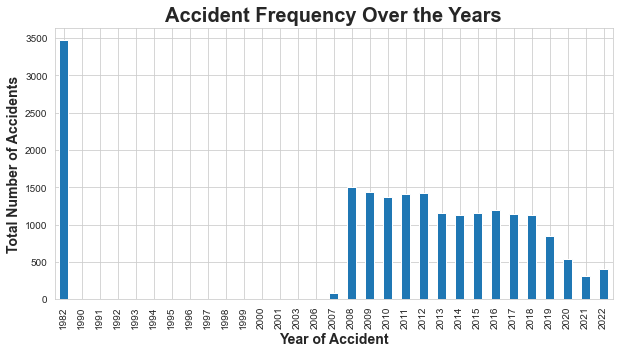

In [259]:
# Create new columns for the year the accident occured
df1_copy['year_of_accident'] = df1_copy['Event.Date'].dt.year

# Count the number of accidents per year
accidents_per_year = df1_copy['year_of_accident'].value_counts().sort_index()

# Plot the trend
plt.figure(figsize=(10, 5))
accidents_per_year.plot(kind='bar')

# Labels and title
plt.xlabel('Year of Accident',fontsize=14, weight='semibold')
plt.ylabel('Total Number of Accidents',fontsize=14, weight='semibold')
plt.title('Accident Frequency Over the Years', fontsize=20, weight='bold')
plt.grid(True)
plt.show()


##### **Observations on Accident Trends Over Time**  

- The highest number of accidents occurred in **1982**, reaching **3,500 incidents**.  
- There was a **complete absence of recorded accidents between 1990 and 2006**.  
- Accident frequency remained relatively low in **2007**, with fewer than **100 incidents**.  
- A spike occurred in **2008**, with accidents surging to **1,500**.  
- Between **2009 and 2018**, accident counts fluctuated between **1,200 and 1,450 per year**.  
- A **notable decline** began in **2019**, dropping to **900 accidents**, followed by a **steady decrease** through **2022**, with **only 400 incidents recorded**.  
- The most recent data (**2021–2022**) suggests a significant reduction in accidents, likely due to improved safety measures, reduced flight activity, or changes in reporting.

#### **ii). Injury Severity Distribution Over the years** 

In [260]:

#pivot table for injury severity

injury_severity = ['Total.Fatal.Injuries', 'Total.Serious.Injuries','Total.Minor.Injuries', 'Total.Uninjured']

injury_severity_aggregate = df1_copy.groupby('year_of_accident')[injury_severity].sum()

injury_severity_aggregate

,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
year_of_accident,,,,
1982,1294.0,678.0,938.0,6633.0
1990,1.0,1.0,0.0,0.0
1991,0.0,0.0,1.0,2.0
1992,27.0,9.0,12.0,3.0
1993,0.0,0.0,0.0,5.0
1994,5.0,1.0,3.0,0.0
1995,0.0,0.0,0.0,5.0
1996,2.0,2.0,3.0,137.0
1997,1.0,1.0,1.0,0.0


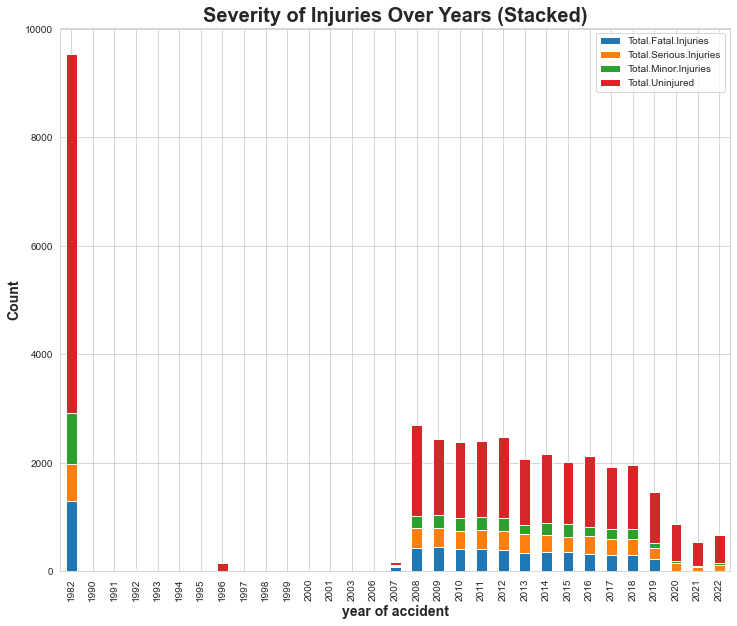

In [261]:
# plotting stacked bar graph 
injury_severity_aggregate.plot(kind='bar',stacked=True, figsize=(12,10))
plt.title('Severity of Injuries Over Years (Stacked)', fontsize=20, weight='bold')
plt.xlabel('year of accident', fontsize=14, weight='semibold')
plt.ylabel('Count', fontsize=14, weight='semibold')

plt.show()

##### **Observation: Injury Severity Distribution Over the Years**  

- In every recorded year, the **total uninjured passengers** consistently outnumber all other injury categories.  
- **Total fatal injuries** are the second-largest category, though significantly lower than uninjured passengers.  
- **Total serious injuries** follow, with **total minor injuries** being the least frequent.  
- **No fatal injuries were recorded in 2020, 2021, and 2022**, yet the number of injured passengers remained high, with notable serious and minor injuries.  
- **1996 only recorded uninjured passengers**, with no data on fatalities or injuries.  
- **2007 recorded only fatal injuries and uninjured passengers**, though the numbers were negligible compared to previous years.

#### **iii). Accident Distribution by country**

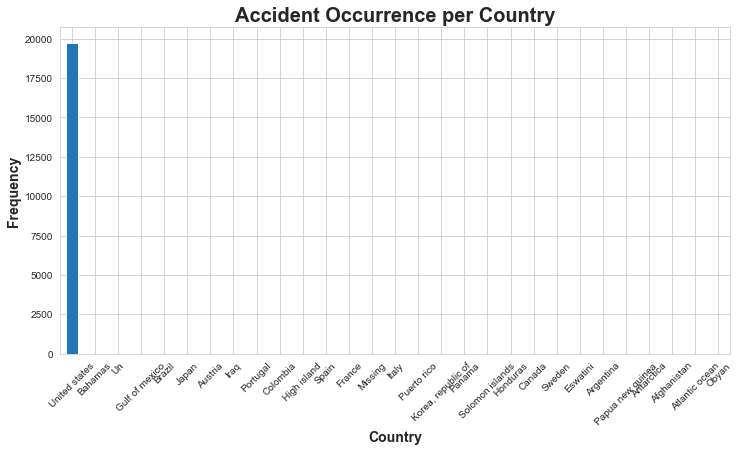

In [262]:
# Count accidents per country
accident_per_country = df1_copy['Country'].value_counts()

# Create a bar graph  
accident_per_country.plot(kind='bar', figsize=(12,6))

# Formatting the plot
plt.title('Accident Occurrence per Country', fontsize=20, weight='bold')
plt.xlabel('Country',fontsize=14, weight='semibold')
plt.ylabel('Frequency', fontsize=14, weight='semibold')
plt.xticks(rotation=45)  # Rotate for readability

# Show the plot
plt.show()


##### **Observation: Accident Distribution by Country**  

All recorded accidents in the dataset occurred in the **United States**, making it the only country represented in the visualization. This could be due to dataset limitations, such as a focus on U.S. aviation incidents or incomplete international records.

#### **iv). Accident Hotspots**

In [263]:
# Count accidents per location
location_counts = df1_copy['Location'].value_counts().head(10)

# Extract data for visualization
locations = location_counts.index
accident_counts = location_counts.values

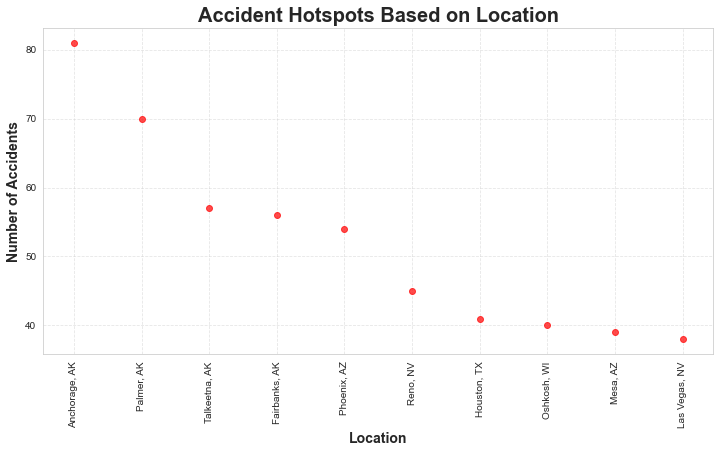

In [264]:
# Scatter plot
plt.figure(figsize=(12, 6))
plt.scatter(locations, accident_counts, alpha=0.7, color='red')

# Labels and title
plt.xlabel('Location',fontsize=14, weight='semibold')
plt.ylabel('Number of Accidents',fontsize=14, weight='semibold')
plt.title('Accident Hotspots Based on Location',fontsize=20, weight='bold')
plt.xticks(rotation=90)  # Rotate for better readability
plt.grid(True, linestyle='--', alpha=0.5)

plt.show()

##### **Observation: Top 10 Accident Hotspots**  

The dataset highlights several key locations with a high concentration of aviation accidents, with multiple hotspots emerging in **Alaska, Arizona, Nevada, Texas, and Wisconsin.** Notably, several cities in **Alaska** appear frequently, suggesting possible regional factors influencing accident occurrences. The presence of major aviation hubs and flight activity levels may also contribute to the distribution of accidents across these locations.

#### **v). Most frequently involved aircrafts** 

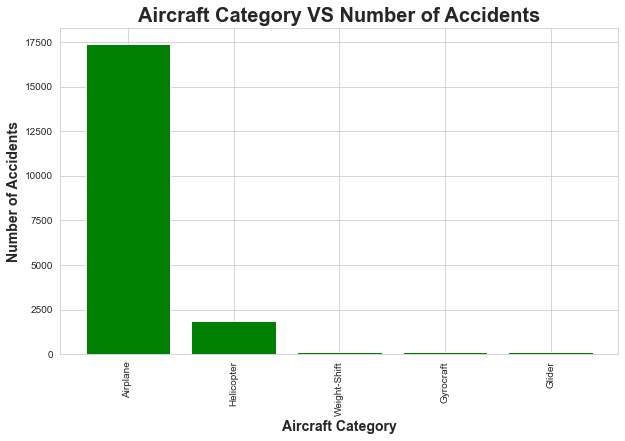

In [265]:
# aircraft counts
aircraft_counts = df1_copy['Aircraft.Category'].value_counts().head()
aircraft_category = aircraft_counts.index
category_accidents = aircraft_counts.values

# Create plot
plt.figure(figsize=(10,6))
plt.bar(aircraft_category, category_accidents, color='green')

# Labels and title
plt.xlabel('Aircraft Category', fontsize=14, weight='semibold')
plt.ylabel('Number of Accidents',fontsize=14, weight='semibold')
plt.title('Aircraft Category VS Number of Accidents',fontsize=20, weight='bold')
plt.xticks(rotation=90)  # Rotate for better readability

plt.show()

##### **Observation: Most Frequently Involved Aircraft Types**  

Airplanes account for the vast majority of recorded accidents, with helicopters following at a significantly lower count. Other aircraft types, such as weight-shift aircraft, gyrocraft, and gliders, have minimal representation in the dataset.

### **c). Bivariate Analysis** 

After exploring individual variables, we now shift our focus to examining relationships between them. This step helps us identify patterns, correlations, and potential dependencies that could provide deeper insights into aviation accidents. By comparing different factors—such as aircraft type and injury severity or weather conditions and accident frequency—we aim to uncover meaningful trends that could aid in risk assessment and aviation safety improvements.

#### **i). Total Fatal Injuries By Make**

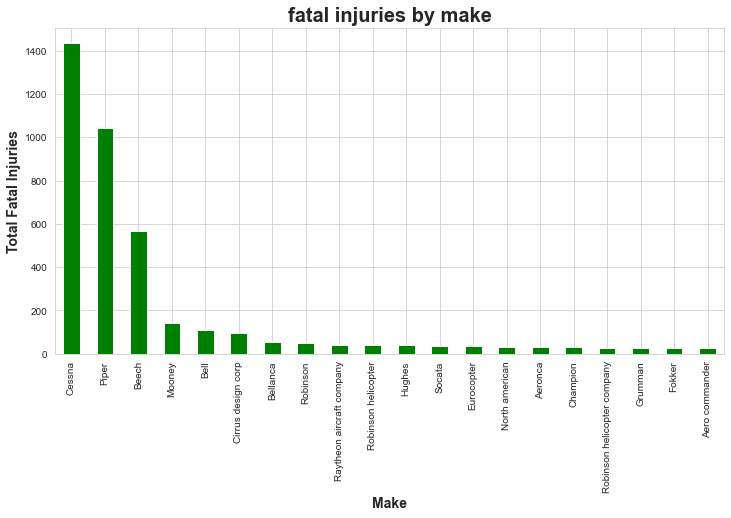

In [268]:
# fatal injuries by make 
fatal_injuries_by_make = df1_copy.groupby('Make')['Total.Fatal.Injuries'].sum().sort_values(ascending=False).head(20)

# Create plot
plt.figure(figsize=(12,6))
fatal_injuries_by_make.plot(kind='bar', color='green')

# Labels and title
plt.title('fatal injuries by make',fontsize=20, weight='bold')
plt.xlabel('Make',fontsize=14, weight='semibold')
plt.ylabel('Total Fatal Injuries',fontsize=14, weight='semibold')

plt.show()

##### **Observation** 
The analysis of total fatal injuries by aircraft make reveals that:
- **Cessna** recorded the highest number, exceeding 1,400 fatalities, 
- In the second place we have **Piper** with over 1,000. 
- **Beech** had nearly 600 fatal injuries
- **Mooney** recorded close to 200. 
- **Bell** exceeded 100 fatalities, 
- **Cirrus Design Corp** accounted for approximately 100. 
- Other manufacturers, including **Bellanca, Robinson, Raytheon Aircraft Company, Hughes, Socata, Eurocopter, North American, Aeronca, Champion, Grumman, Fokker, and Aero Commander**, exhibited a noticeable downward trend in fatality counts.

#### **i). Average Fatal Injuries By Make**

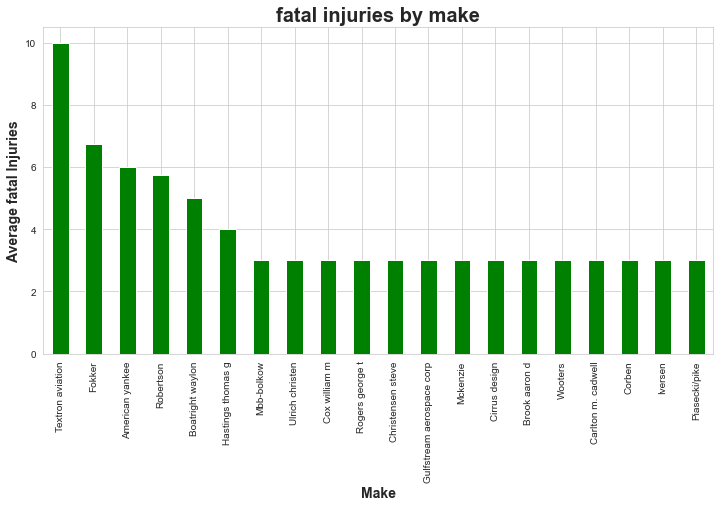

In [272]:
# Average fatal injuries by make
fatal_injuries_by_make = df1_copy.groupby('Make')['Total.Fatal.Injuries'].mean().sort_values(ascending=False).head(20)

# Create the plot 
plt.figure(figsize=(12,6))
fatal_injuries_by_make.plot(kind='bar', color='green')

# Plot labels and title
plt.title('fatal injuries by make',fontsize=20,weight='bold')
plt.ylabel('Average fatal Injuries',fontsize=14,weight='semibold')
plt.xlabel('Make',fontsize=14,weight='semibold')

plt.show()

#### **Observation**


#### **i). Average Fatal Injuries By Model**

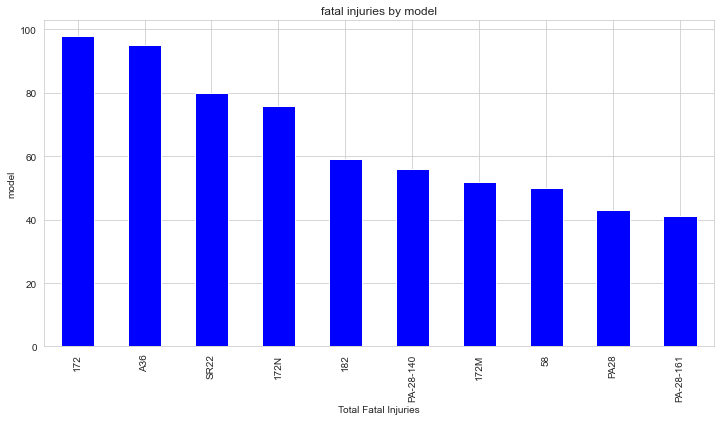

In [ ]:
fatal_injuries_by_make = df1_copy.groupby('Model')['Total.Fatal.Injuries'].sum().sort_values(ascending=False).head(10)


plt.figure(figsize=(12,6))

fatal_injuries_by_make.plot(kind='bar', color='blue')

plt.title('fatal injuries by model')
plt.ylabel('model')
plt.xlabel('Total Fatal Injuries')

plt.show()

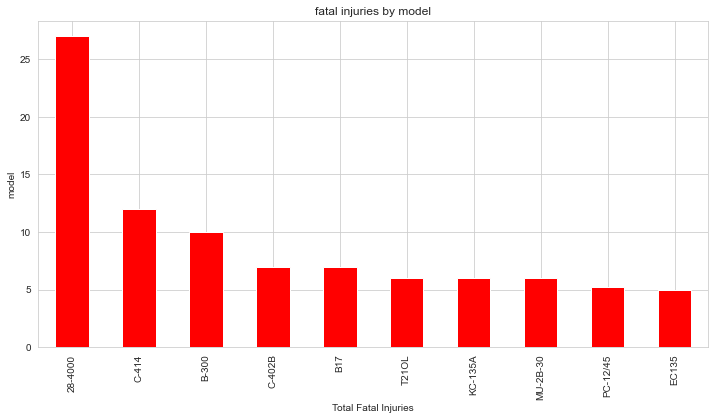

In [ ]:
fatal_injuries_by_make = df1_copy.groupby('Model')['Total.Fatal.Injuries'].mean().sort_values(ascending=False).head(10)


plt.figure(figsize=(12,6))

fatal_injuries_by_make.plot(kind='bar', color='red')

plt.title('fatal injuries by model')
plt.ylabel('model')
plt.xlabel('Total Fatal Injuries')

plt.show()

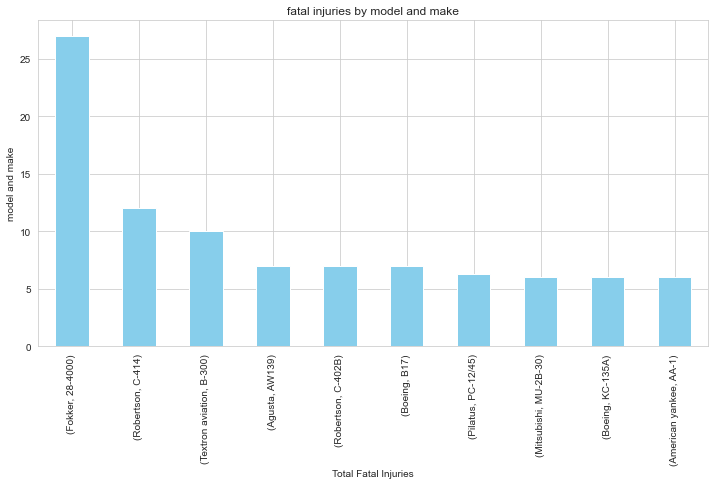

In [ ]:
fatal_injuries_count = df1_copy.groupby(['Make','Model'])['Total.Fatal.Injuries'].mean().sort_values(ascending=False).head(10)


plt.figure(figsize=(12,6))

fatal_injuries_count.plot(kind='bar', color='skyblue')

plt.title('fatal injuries by model and make')
plt.ylabel('model and make')
plt.xlabel('Total Fatal Injuries')

plt.show()

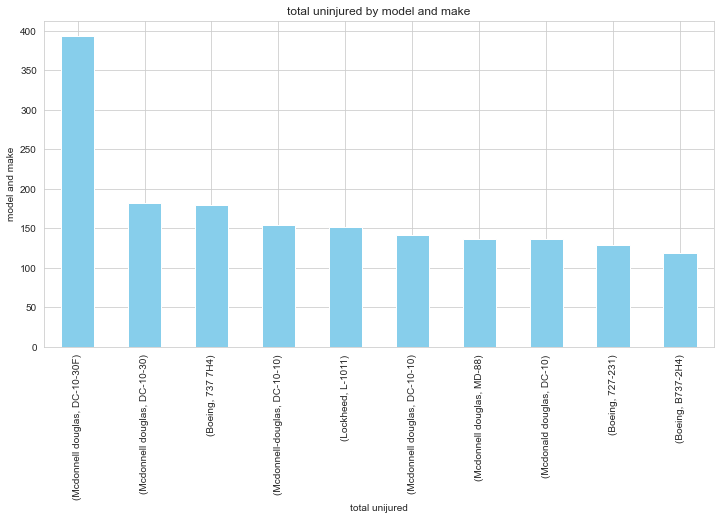

In [ ]:
fatal_injuries_count = df1_copy.groupby(['Make','Model'])['Total.Uninjured'].mean().sort_values(ascending=False).head(10)


plt.figure(figsize=(12,6))

fatal_injuries_count.plot(kind='bar', color='skyblue')

plt.title('total uninjured by model and make')
plt.ylabel('model and make')
plt.xlabel('total unijured')

plt.show()

**Number of accidents per aircraft make and model**

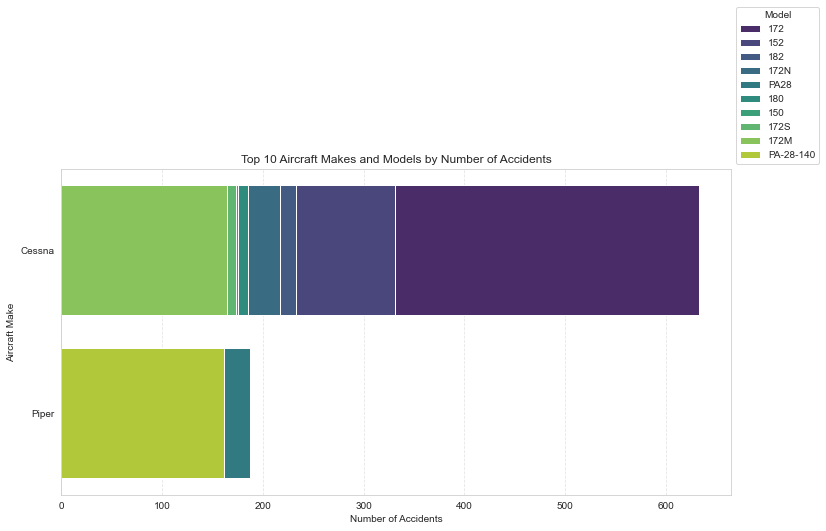

In [ ]:
# Get the top 10 most common aircraft make and model combinations
top_makes_models = df1_copy.groupby(['Make', 'Model']).size().reset_index(name='Accident Count')
top_makes_models = top_makes_models.sort_values(by='Accident Count', ascending=False).head(10)

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(data=top_makes_models, x='Accident Count', y='Make', hue='Model', dodge=False, palette='viridis')

# Labels and title
plt.xlabel('Number of Accidents')
plt.ylabel('Aircraft Make')
plt.title('Top 10 Aircraft Makes and Models by Number of Accidents')
plt.legend(title='Model', bbox_to_anchor=(1, 1))  # Move legend outside for clarity
plt.grid(axis='x', linestyle='--', alpha=0.5)

plt.show()

**Total.Fatal.Injuries by Engine.Type**

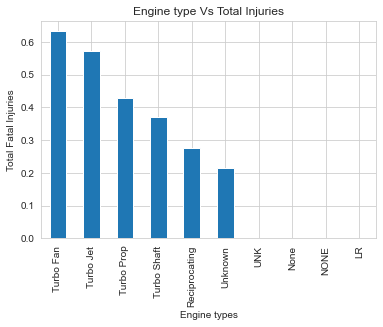

In [ ]:
injuries_and_engine_type = df1_copy.groupby('Engine.Type')['Total.Fatal.Injuries'].mean().sort_values(ascending=False).head(10)

injuries_and_engine_type.plot(kind='bar')

plt.title('Engine type Vs Total Injuries')
plt.xlabel('Engine types')
plt.ylabel('Total Fatal Injuries')

plt.show()

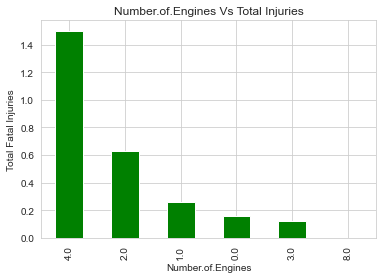

In [ ]:
injuries_and_engine_type = df1_copy.groupby('Number.of.Engines')['Total.Fatal.Injuries'].mean().sort_values(ascending=False).head(10)

injuries_and_engine_type.plot(kind='bar', color='green')

plt.title('Number.of.Engines Vs Total Injuries')
plt.xlabel('Number.of.Engines')
plt.ylabel('Total Fatal Injuries')

plt.show()

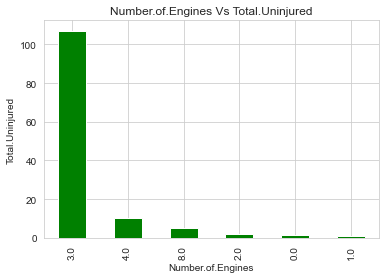

In [ ]:
injuries_and_engine_type = df1_copy.groupby('Number.of.Engines')['Total.Uninjured'].mean().sort_values(ascending=False).head(10)

injuries_and_engine_type.plot(kind='bar', color='green')

plt.title('Number.of.Engines Vs Total.Uninjured')
plt.xlabel('Number.of.Engines')
plt.ylabel('Total.Uninjured')

plt.show()

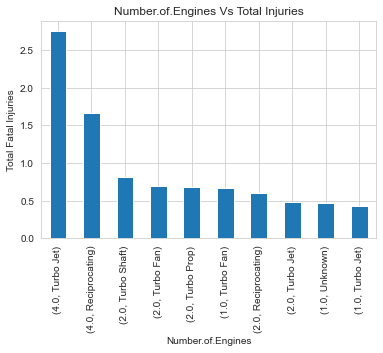

In [ ]:
injuries_and_engine_type = df1_copy.groupby(['Number.of.Engines','Engine.Type'])['Total.Fatal.Injuries'].mean().sort_values(ascending=False).head(10)

injuries_and_engine_type.plot(kind='bar')

plt.title('Number.of.Engines Vs Total Injuries')
plt.xlabel('Number.of.Engines')
plt.ylabel('Total Fatal Injuries')

plt.show()

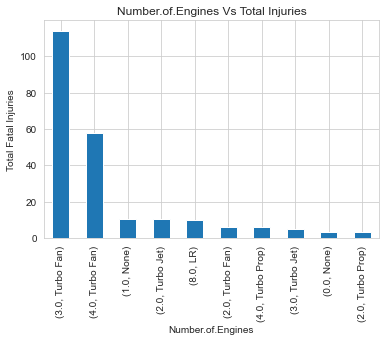

In [ ]:
injuries_and_engine_type = df1_copy.groupby(['Number.of.Engines','Engine.Type'])['Total.Uninjured'].mean().sort_values(ascending=False).head(10)

injuries_and_engine_type.plot(kind='bar')

plt.title('Number.of.Engines Vs Total Injuries')
plt.xlabel('Number.of.Engines')
plt.ylabel('Total Fatal Injuries')

plt.show()

In [ ]:
df1_copy['Injury.Severity'].unique()

array(['Non-Fatal', 'Fatal(1)', 'Fatal(2)', 'Fatal(3)', 'Incident',
       'Fatal(8)', 'Fatal(4)', 'Fatal(7)', 'Fatal(6)', 'Fatal(5)',
       'Fatal(12)', 'Fatal(27)', 'Fatal', 'Minor', 'Serious'],
      dtype=object)

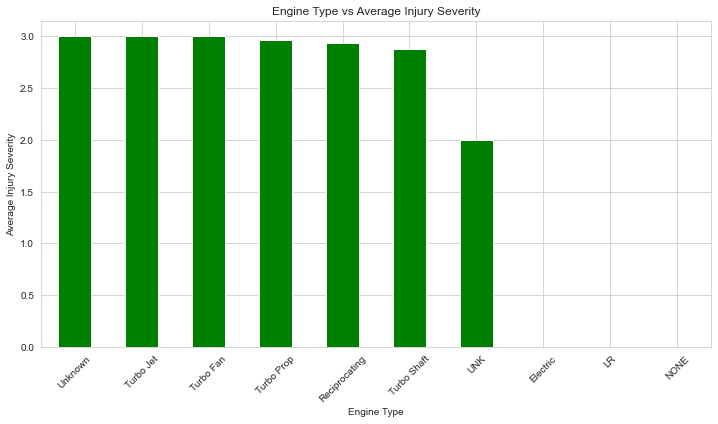

In [ ]:
# Step 1: Convert 'Injury.Severity' into numeric values
severity_mapping = {
    "None": 0,
    "Minor": 1,
    "Serious": 2,
    "Fatal": 3
}

df1_copy['Injury.Severity.Num'] = df1_copy['Injury.Severity'].map(severity_mapping)

# Step 2: Group by Engine Type and calculate mean severity
injuries_and_engine_type = (
    df1_copy.groupby('Engine.Type')['Injury.Severity.Num']
    .mean()
    .sort_values(ascending=False)
    .head(10)
)

# Step 3: Plot the data
plt.figure(figsize=(12,6))
injuries_and_engine_type.plot(kind='bar', color='green')

# Formatting the plot
plt.title('Engine Type vs Average Injury Severity')
plt.xlabel('Engine Type')
plt.ylabel('Average Injury Severity')
plt.xticks(rotation=45)  # Rotate labels for readability
plt.show()


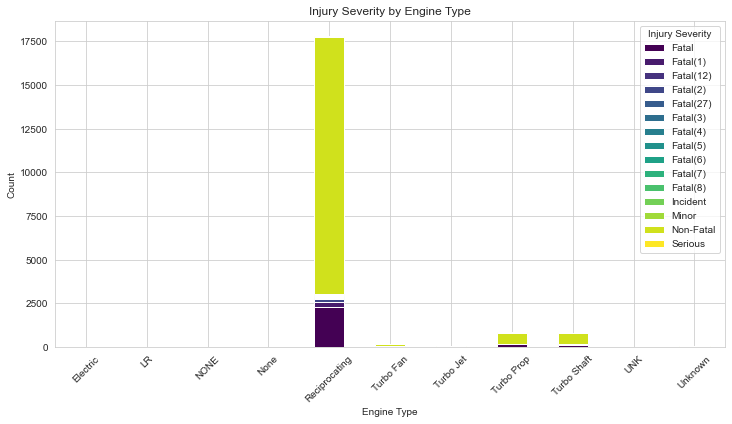

In [ ]:
import matplotlib.pyplot as plt

# Create a crosstab of Injury Severity vs. Engine Type
severity_engine = pd.crosstab(df1_copy['Engine.Type'], df1_copy['Injury.Severity'])

# Plot stacked bar chart
severity_engine.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='viridis')

# Labels and title
plt.xlabel('Engine Type')
plt.ylabel('Count')
plt.title('Injury Severity by Engine Type')
plt.legend(title='Injury Severity', bbox_to_anchor=(1, 1))  # Move legend outside
plt.xticks(rotation=45)  # Rotate x-axis labels for readability

plt.show()


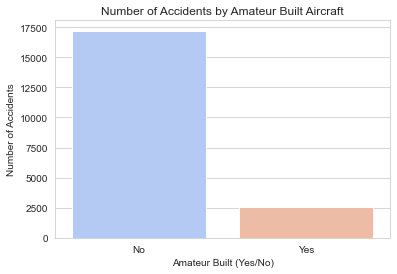

In [ ]:
# Count of accidents by Amateur.Built
plt.figure(figsize=(6, 4))
sns.countplot(data=df1_copy, x='Amateur.Built', palette='coolwarm')

# Labels and title
plt.xlabel('Amateur Built (Yes/No)')
plt.ylabel('Number of Accidents')
plt.title('Number of Accidents by Amateur Built Aircraft')

plt.show()

In [ ]:
df1_copy.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Injury.Severity,Aircraft.damage,Aircraft.Category,Registration.Number,Make,Model,Amateur.Built,Number.of.Engines,Engine.Type,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Report.Status,Publication.Date,year_of_accident,Injury.Severity.Num
7,20020909X01562,Accident,SEA82DA022,1982-01-01,"PULLMAN, WA",United States,Non-Fatal,Substantial,Airplane,N2482N,Cessna,140,No,1.0,Reciprocating,Personal,0.0,0.0,0.0,2.0,VMC,Probable Cause,1982-01-01,1982,NaN
8,20020909X01561,Accident,NYC82DA015,1982-01-01,"EAST HANOVER, NJ",United States,Non-Fatal,Substantial,Airplane,N7967Q,Cessna,401B,No,2.0,Reciprocating,Business,0.0,0.0,0.0,2.0,IMC,Probable Cause,1982-01-01,1982,NaN
12,20020917X02148,Accident,FTW82FRJ07,1982-01-02,"HOMER, LA",United States,Non-Fatal,Destroyed,Airplane,N14779,Bellanca,17-30A,No,1.0,Reciprocating,Personal,0.0,0.0,1.0,0.0,IMC,Probable Cause,1983-02-01,1982,NaN
13,20020917X02134,Accident,FTW82FRA14,1982-01-02,"HEARNE, TX",United States,Fatal(1),Destroyed,Airplane,N758SK,Cessna,R172K,No,1.0,Reciprocating,Personal,1.0,0.0,0.0,0.0,IMC,Probable Cause,1983-02-01,1982,NaN
14,20020917X02119,Accident,FTW82FPJ10,1982-01-02,"CHICKASHA, OK",United States,Fatal(1),Destroyed,Airplane,N4876K,Navion,A,No,1.0,Reciprocating,Personal,1.0,0.0,0.0,0.0,IMC,Probable Cause,1983-02-01,1982,NaN


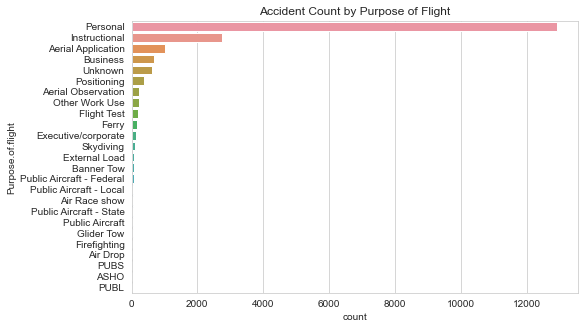

In [ ]:
plt.figure(figsize=(8, 5))
sns.countplot(y='Purpose.of.flight', data=df1_copy, order=df1_copy['Purpose.of.flight'].value_counts().index)
plt.title("Accident Count by Purpose of Flight")
plt.show()


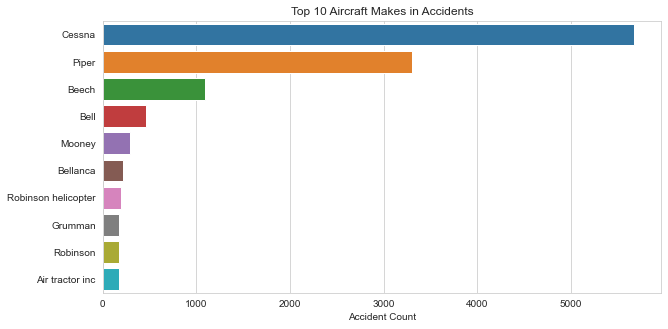

In [ ]:
plt.figure(figsize=(10, 5))
top_makes = df1_copy['Make'].value_counts().nlargest(10)  # Top 10 makes
sns.barplot(x=top_makes.values, y=top_makes.index)
plt.title("Top 10 Aircraft Makes in Accidents")
plt.xlabel("Accident Count")
plt.show()


In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(y='Make', hue='Aircraft.damage', data=df_top_makes, order=top_makes_list)
plt.title("Aircraft Damage by Make")
plt.show()


NameError: name 'df_top_makes' is not defined

<Figure size 864x432 with 0 Axes>

### **Categorical Variable Relationships**
Understanding categorical variables can reveal patterns in aviation accidents. We visualize factors like Injury Severity, Weather Conditions, and Aircraft Damage to identify trends that might contribute to accident outcomes.  


##### **Weather Conditions During Accidents**

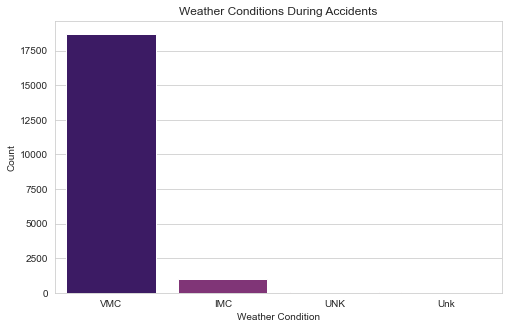

In [ ]:
#countplot for weather conditions during accidents 
plt.figure(figsize=(8,5))
sns.countplot(data=df1_copy, x="Weather.Condition", order=df1_copy["Weather.Condition"].value_counts().index, palette="magma")
plt.title("Weather Conditions During Accidents")
plt.xlabel("Weather Condition")
plt.ylabel("Count")
plt.show()



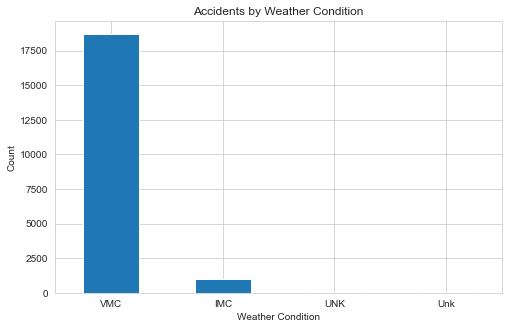

In [ ]:
# Bar plot for weather conditions during accidents
df1_copy['Weather.Condition'].value_counts().plot(kind='bar', figsize=(8,5))
plt.title('Accidents by Weather Condition')
plt.xlabel('Weather Condition')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()


#####  **Aircraft Damage Distribution**
This distribution helps us understand how often aircraft are destroyed or sustain substantial damage in accidents.  

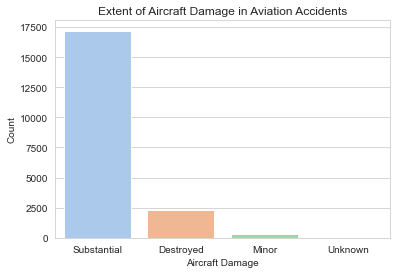

In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(data=df1_copy, x="Aircraft.damage", order=df1_copy["Aircraft.damage"].value_counts().index, palette="pastel")
plt.title("Extent of Aircraft Damage in Aviation Accidents")
plt.xlabel("Aircraft Damage")
plt.ylabel("Count")
plt.show()


##### **Purpose of Flight Distribution**
This distribution gives insight into whether accidents are more common during personal, business, training, or other flight types.  

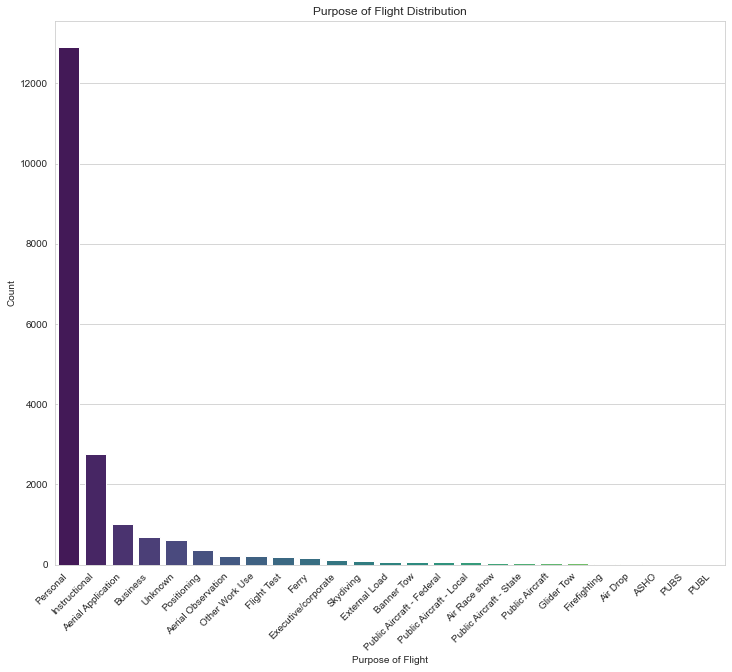

In [ ]:
plt.figure(figsize=(12,10))  # Increased width for better readability
sns.countplot(data=df1_copy, x="Purpose.of.flight", order=df1_copy["Purpose.of.flight"].value_counts().index, palette="viridis")
plt.xticks(rotation=45, ha="right")  # Rotate labels for readability
plt.title("Purpose of Flight Distribution")
plt.xlabel("Purpose of Flight")
plt.ylabel("Count")
plt.show()
